# Introduction
This notebook illustrates solving a problem using univariate and multivariate linear regression. The base material is a python implementation of Andrew's example. 
## Data 
The first problem involves predicting the sales revenue of a food truck given the population of the area where it is put up.
Let us readin the data and plot it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

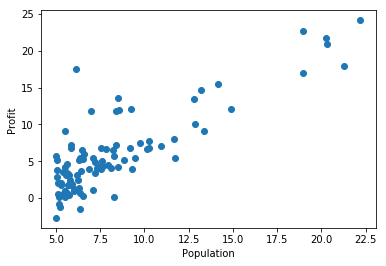

[ 6.1101  5.5277  8.5186  7.0032  5.8598]
[ 17.592    9.1302  13.662   11.854    6.8233]


In [2]:
frame = pd.read_csv('ex1data1.txt',header=None,names=["population","profit"])
X_orig = frame['population'].values
y_orig = frame['profit'].values
m = len(y_orig)
def draw_scatter_plot_with_labels(X,y,xlabel,ylabel):
    plt.scatter(X_orig,y_orig)
    plt.xlabel('Population')
    plt.ylabel('Profit')
draw_scatter_plot_with_labels(X_orig,y_orig,'Population','Profit')
plt.show()
print(X_orig[:5])
print(y_orig[:5])

The population and profit are presented in thousands. There seems to be a reasonable correlation between population and profit. Let us try to come up with a hypothesis using linear regression.

## Cost function and gradient descent.
The cost function is the squared error cost and its derivative as the gradient.

In [3]:
def computeCost(X,y,theta):
    m = len(y)
    J = (np.sum((np.dot(X,theta)-y)**2))/(2*m)
    return J

def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)
    J_history = np.zeros(m)
    for iter in range(num_iters):
        theta = theta - (alpha/m)*(np.dot(np.dot(X,theta)-y,X))
    return((theta,J_history))

# Sanity check for computeCost
tempX = np.c_[np.ones(m),X_orig]
tempCost = computeCost(tempX,y_orig,np.array([0,0]))
assert((tempCost > 32.07) & (tempCost < 32.08))
tempCost = computeCost(tempX,y_orig,np.array([-1,2]))
assert((tempCost > 54.2) & (tempCost < 54.3))


Let us run gradient descent and see the hypothesis it comes up with.

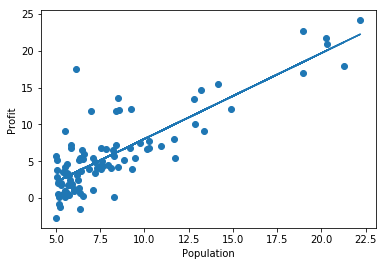

In [4]:
alpha = 0.01
iterations = 1500
X = np.c_[np.ones(m),X_orig] #Add X0 feature column with value of 1
theta = np.zeros(2)
theta,_ = gradientDescent(X,y_orig,theta,alpha,iterations) #Expected -3.63,1.166
draw_scatter_plot_with_labels(X_orig,y_orig,'Population','Profit')
plt.plot(X_orig,np.dot(X,theta))
plt.show()

To get predictions, we need to add an additional feature(with value 1) before multiplying.

In [5]:
print(np.dot([1,3.5],theta)*10000) # Should be around 4500
print(np.dot([1,7.0],theta)*10000) # Should be around 45,000

4519.7678677
45342.4501294


As an addition, let us see how the cost function will vary for a variety of theta values

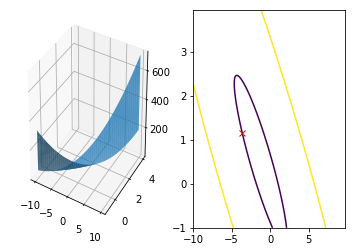

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
theta0_vals = np.arange(-10,10,0.2)
theta1_vals = np.arange(-1,4,0.05)
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        tThetas = [theta0_vals[i],theta1_vals[j]]
        J_vals[i,j] = computeCost(X,y_orig,tThetas)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax2 = fig.add_subplot(1,2,2)
ax1.plot_surface(theta0_vals, theta1_vals, J_vals)
ax2.contour(theta0_vals, theta1_vals, J_vals,locator=ticker.LogLocator())
ax2.plot(theta[0],theta[1],'rx')
plt.show()
        